# ARC Problem Visualization

This notebook visualizes the 8 selected ARC problems in a grid format similar to the ARC viewer.

In [3]:
!pip install numpy matplotlib
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.4-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 37.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 83.7 MB/s  0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 74.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 87.4 MB/s  0:00:00
Using cached pyparsing-3.2.4-py3-none-any.whl (113 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [matplotlib]8 [matplotlib]


In [4]:
# Define ARC color palette
arc_colors = [
    '#000000',  # 0: Black
    '#0074D9',  # 1: Blue
    '#FF4136',  # 2: Red
    '#2ECC40',  # 3: Green
    '#FFDC00',  # 4: Yellow
    '#AAAAAA',  # 5: Gray
    '#F012BE',  # 6: Magenta
    '#FF851B',  # 7: Orange
    '#7FDBFF',  # 8: Light Blue
    '#870C25'   # 9: Brown
]

cmap = ListedColormap(arc_colors)

In [ ]:
# Load the data
with open('../data/selected_challenges.json', 'r') as f:
    challenges = json.load(f)
    
with open('../data/selected_solutions.json', 'r') as f:
    solutions = json.load(f)

# Get problem IDs
problem_ids = list(challenges.keys())
print(f"Loaded {len(problem_ids)} problems: {problem_ids}")

Loaded 8 problems: ['a8610ef7', 'b4a43f3b', '79fb03f4', '52fd389e', '891232d6', 'aa4ec2a5', 'a3f84088', '8719f442']


In [7]:
def plot_grid(ax, grid, title='', show_grid=True):
    """Plot a single grid with ARC colors."""
    grid = np.array(grid)
    height, width = grid.shape
    
    # Display the grid
    im = ax.imshow(grid, cmap=cmap, vmin=0, vmax=9)
    
    # Add grid lines
    if show_grid:
        # Major ticks
        ax.set_xticks(np.arange(-0.5, width, 1), minor=True)
        ax.set_yticks(np.arange(-0.5, height, 1), minor=True)
        ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.5)
        ax.tick_params(which="minor", size=0)
        ax.tick_params(which="major", size=0)
    
    # Remove tick labels
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Set title
    ax.set_title(title, fontsize=10, pad=5)
    
    # Add border
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.5)

In [8]:
def visualize_problem(problem_id, challenges, solutions, figsize=(16, 12)):
    """Visualize a single ARC problem with all training examples and test case."""
    problem = challenges[problem_id]
    solution = solutions[problem_id] if problem_id in solutions else None
    
    train_examples = problem['train']
    test_examples = problem['test']
    
    # Calculate layout
    n_train = len(train_examples)
    n_test = len(test_examples)
    
    # Create figure with custom layout
    fig = plt.figure(figsize=figsize)
    fig.suptitle(f'Problem: {problem_id}', fontsize=14, fontweight='bold')
    
    # Calculate grid dimensions
    total_rows = max(n_train, n_test)
    
    # Create grid spec
    gs = gridspec.GridSpec(total_rows + 1, 4, figure=fig, hspace=0.4, wspace=0.3)
    
    # Add section headers
    ax_train_header = fig.add_subplot(gs[0, :2])
    ax_train_header.text(0.5, 0.5, 'Train', ha='center', va='center', fontsize=12, fontweight='bold')
    ax_train_header.axis('off')
    
    ax_test_header = fig.add_subplot(gs[0, 2:])
    ax_test_header.text(0.5, 0.5, 'Test', ha='center', va='center', fontsize=12, fontweight='bold')
    ax_test_header.axis('off')
    
    # Plot training examples
    for i, example in enumerate(train_examples):
        # Input
        ax_input = fig.add_subplot(gs[i+1, 0])
        plot_grid(ax_input, example['input'], f'Input {i+1}')
        
        # Output
        ax_output = fig.add_subplot(gs[i+1, 1])
        plot_grid(ax_output, example['output'], f'Output {i+1}')
    
    # Plot test examples
    for i, example in enumerate(test_examples):
        # Test input
        ax_test_input = fig.add_subplot(gs[i+1, 2])
        plot_grid(ax_test_input, example['input'], f'Test Input {i+1}')
        
        # Test output (solution)
        ax_test_output = fig.add_subplot(gs[i+1, 3])
        if solution and i < len(solution):
            plot_grid(ax_test_output, solution[i], f'Test Output {i+1}')
        else:
            ax_test_output.text(0.5, 0.5, '?', ha='center', va='center', fontsize=24, color='gray')
            ax_test_output.set_title(f'Test Output {i+1}', fontsize=10)
            ax_test_output.axis('off')
            for spine in ax_test_output.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(1.5)
    
    plt.tight_layout()
    return fig

/var/folders/nr/stbj19xd6kdbysxx0g064s180000gn/T/ipykernel_70771/764808414.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


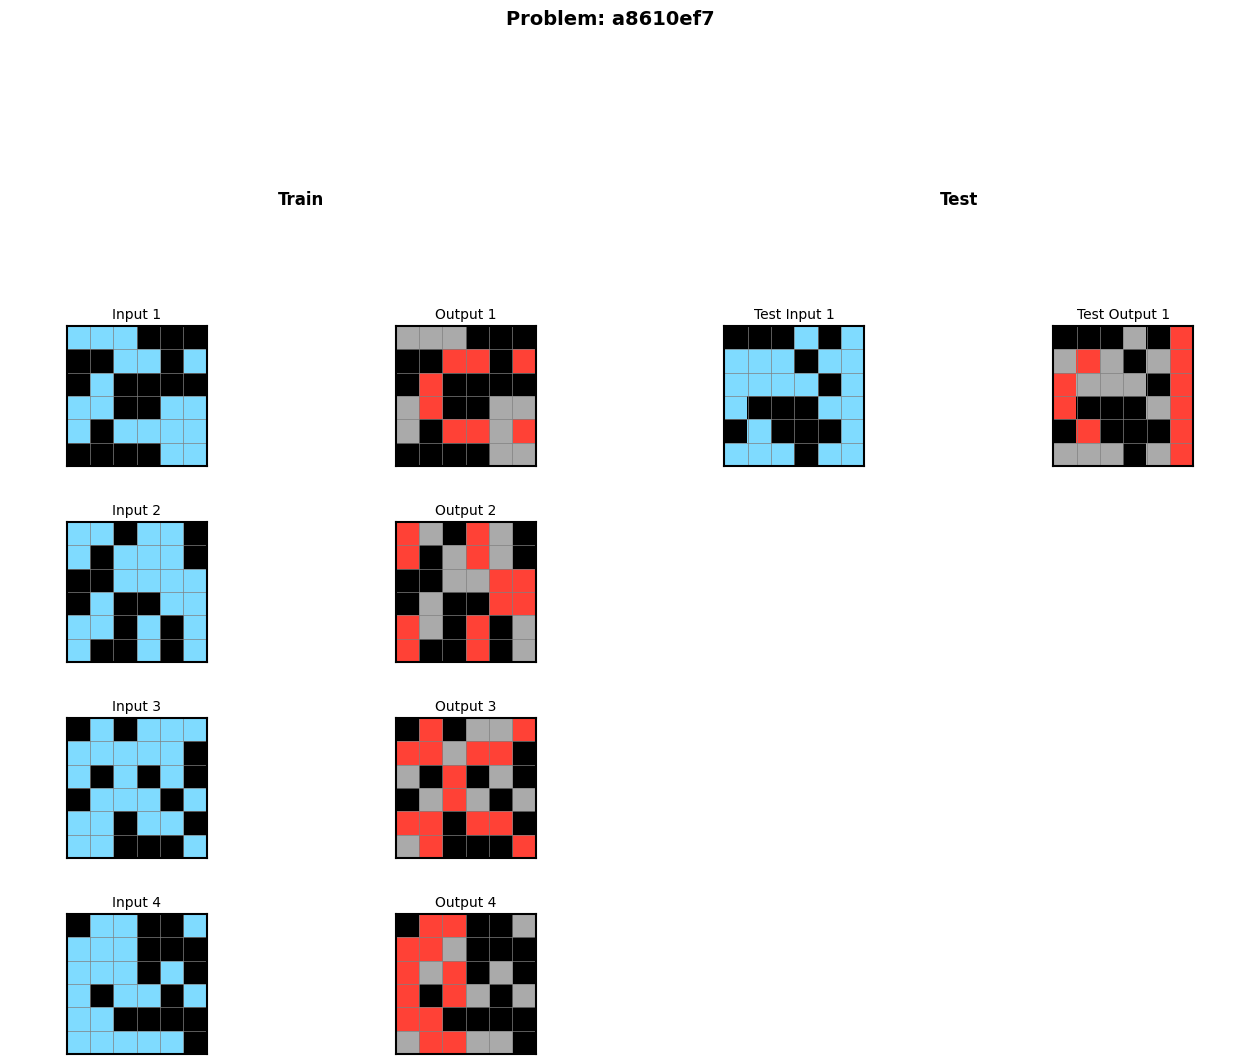

In [9]:
# Visualize first problem as a test
fig = visualize_problem(problem_ids[0], challenges, solutions)
plt.show()

In [10]:
# Function to create a compact visualization of all problems
def visualize_all_problems_compact(problem_ids, challenges, solutions, max_examples=3):
    """Create a compact visualization showing all problems in a grid."""
    n_problems = len(problem_ids)
    
    # Create subplots grid
    fig, axes = plt.subplots(n_problems, 6, figsize=(18, n_problems * 3))
    fig.suptitle('ARC Problems Overview', fontsize=16, fontweight='bold')
    
    for idx, problem_id in enumerate(problem_ids):
        problem = challenges[problem_id]
        solution = solutions[problem_id] if problem_id in solutions else None
        
        # Add problem ID label
        axes[idx, 0].text(0.5, 0.5, problem_id, ha='center', va='center', 
                         fontsize=10, fontweight='bold', rotation=0)
        axes[idx, 0].axis('off')
        
        # Show first training example
        if len(problem['train']) > 0:
            plot_grid(axes[idx, 1], problem['train'][0]['input'], 'Train Input')
            plot_grid(axes[idx, 2], problem['train'][0]['output'], 'Train Output')
        else:
            axes[idx, 1].axis('off')
            axes[idx, 2].axis('off')
        
        # Show second training example if available
        if len(problem['train']) > 1:
            plot_grid(axes[idx, 3], problem['train'][1]['input'], 'Train Input 2')
            plot_grid(axes[idx, 4], problem['train'][1]['output'], 'Train Output 2')
        else:
            axes[idx, 3].axis('off')
            axes[idx, 4].axis('off')
        
        # Show test input
        if len(problem['test']) > 0:
            plot_grid(axes[idx, 5], problem['test'][0]['input'], 'Test Input')
        else:
            axes[idx, 5].axis('off')
    
    plt.tight_layout()
    return fig

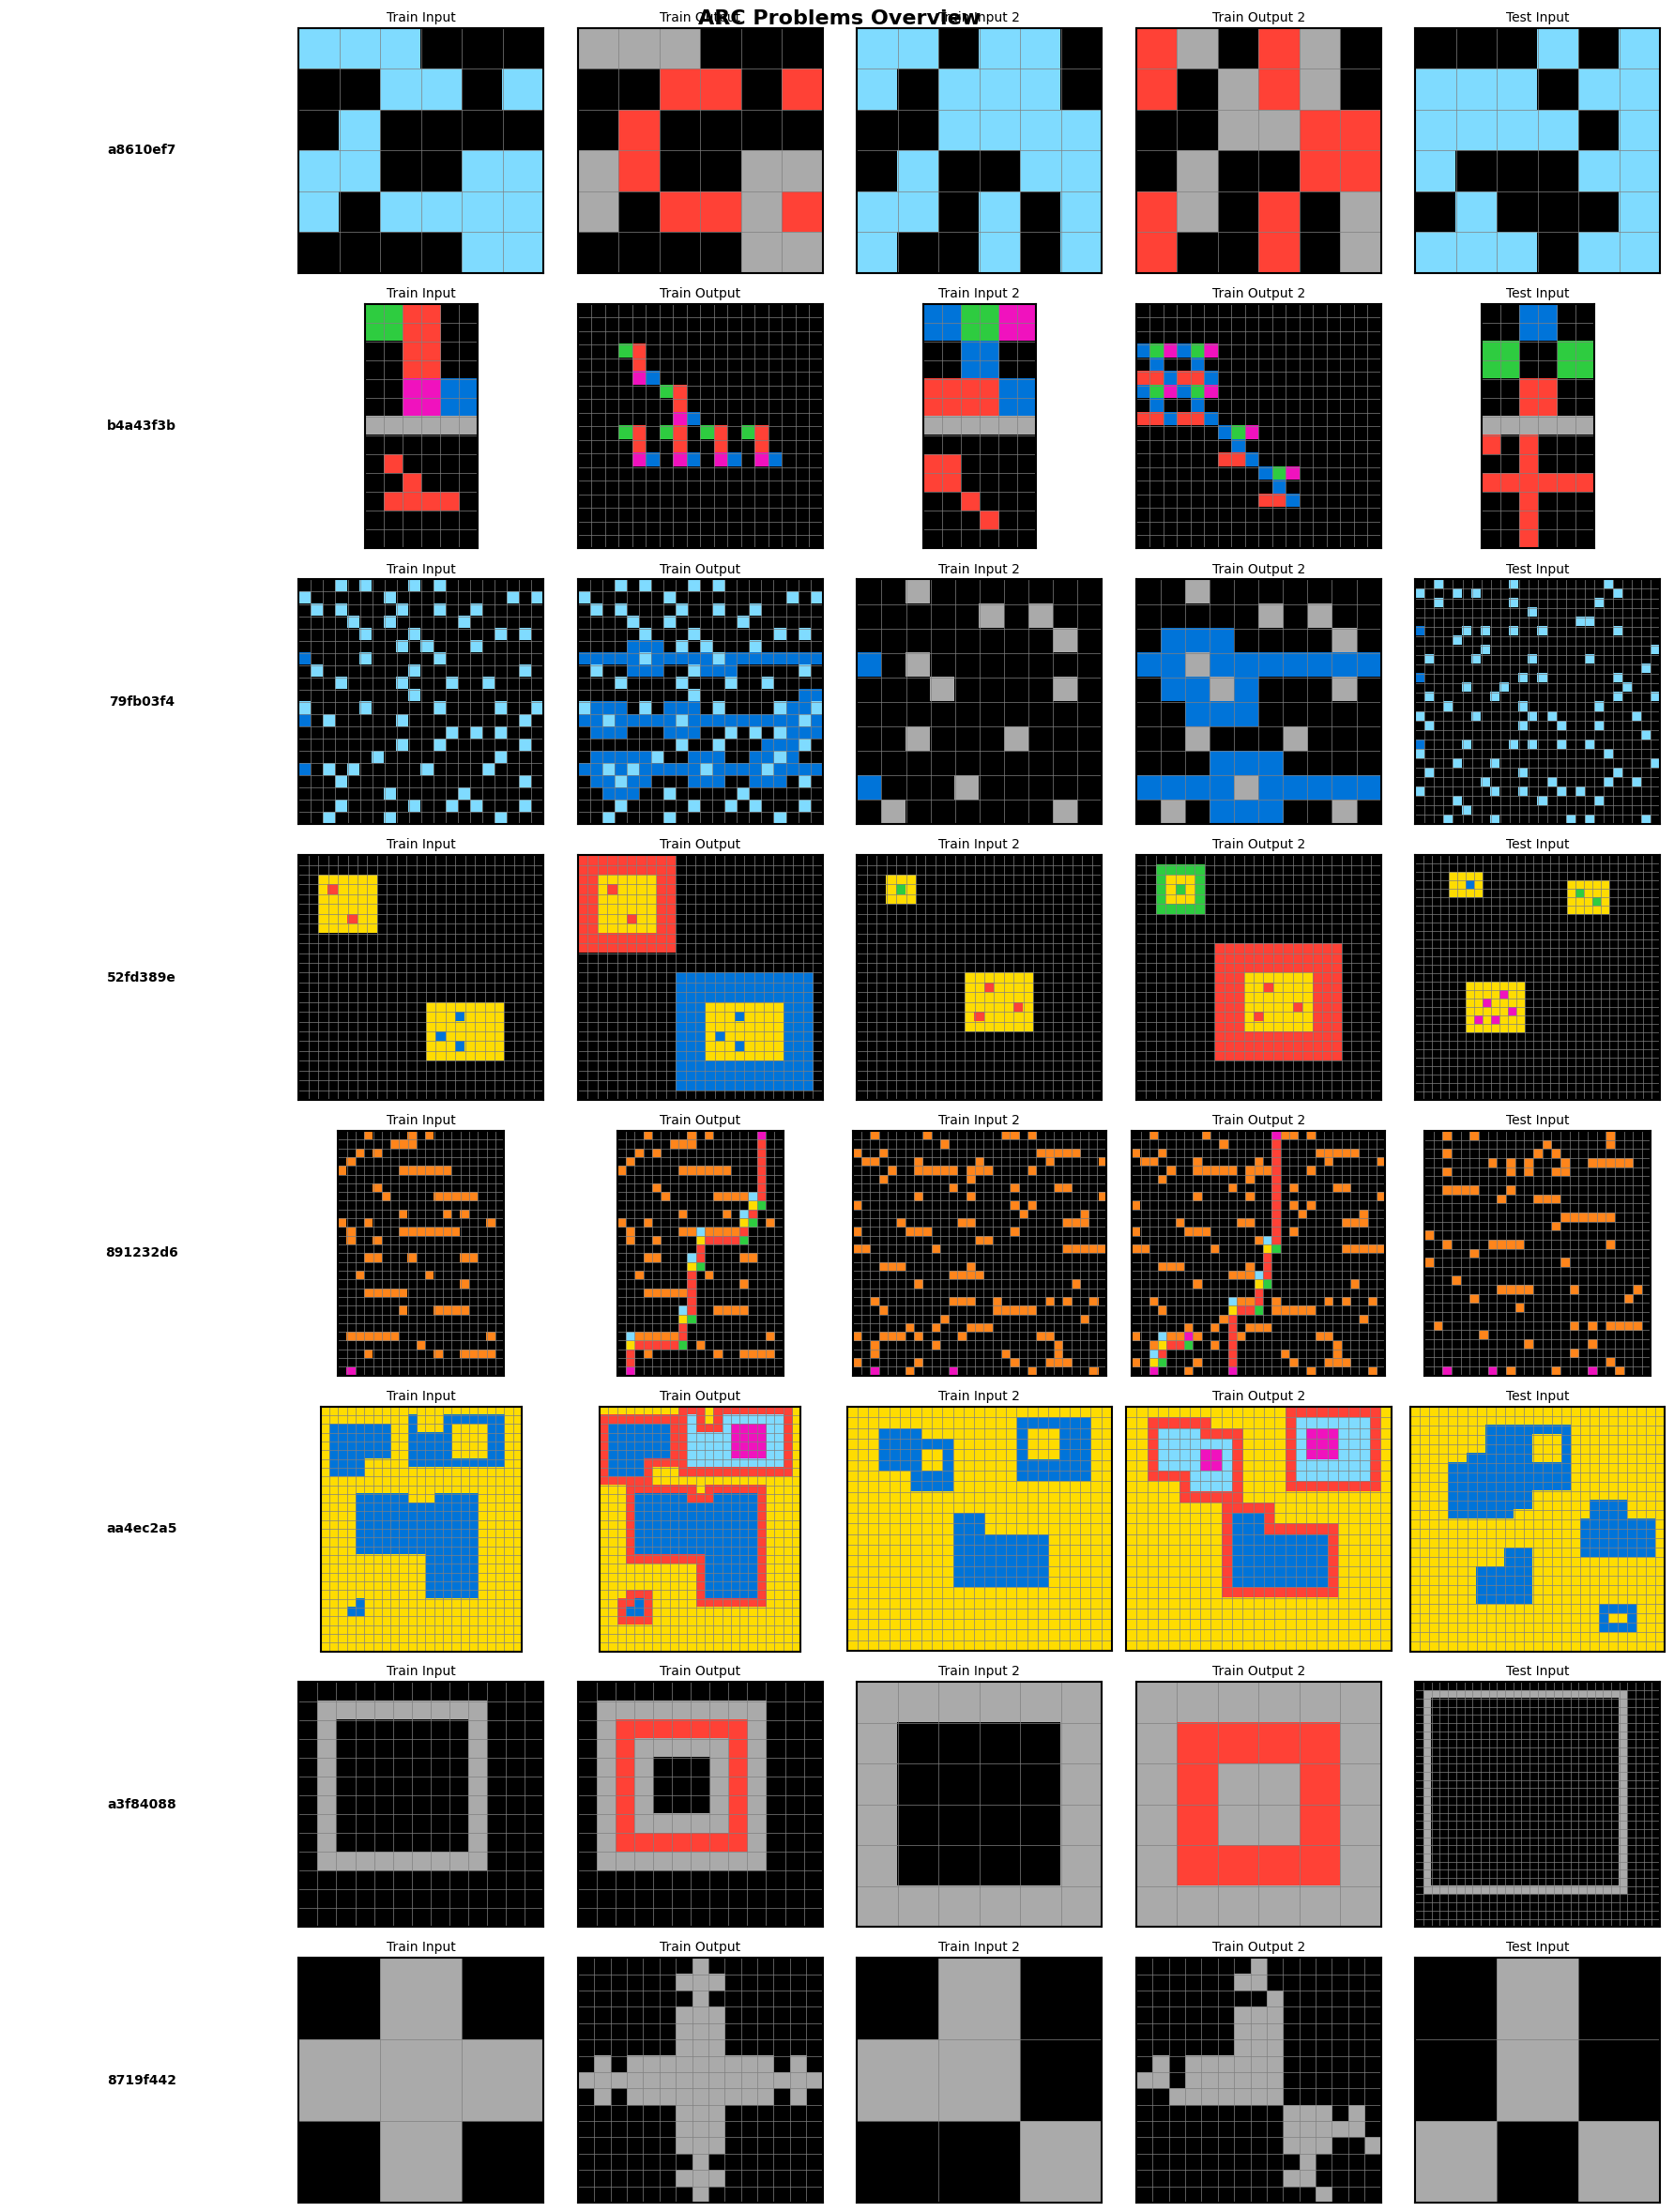

In [11]:
# Create compact overview of all problems
fig = visualize_all_problems_compact(problem_ids, challenges, solutions)
plt.show()


Problem: a8610ef7


/var/folders/nr/stbj19xd6kdbysxx0g064s180000gn/T/ipykernel_70771/764808414.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


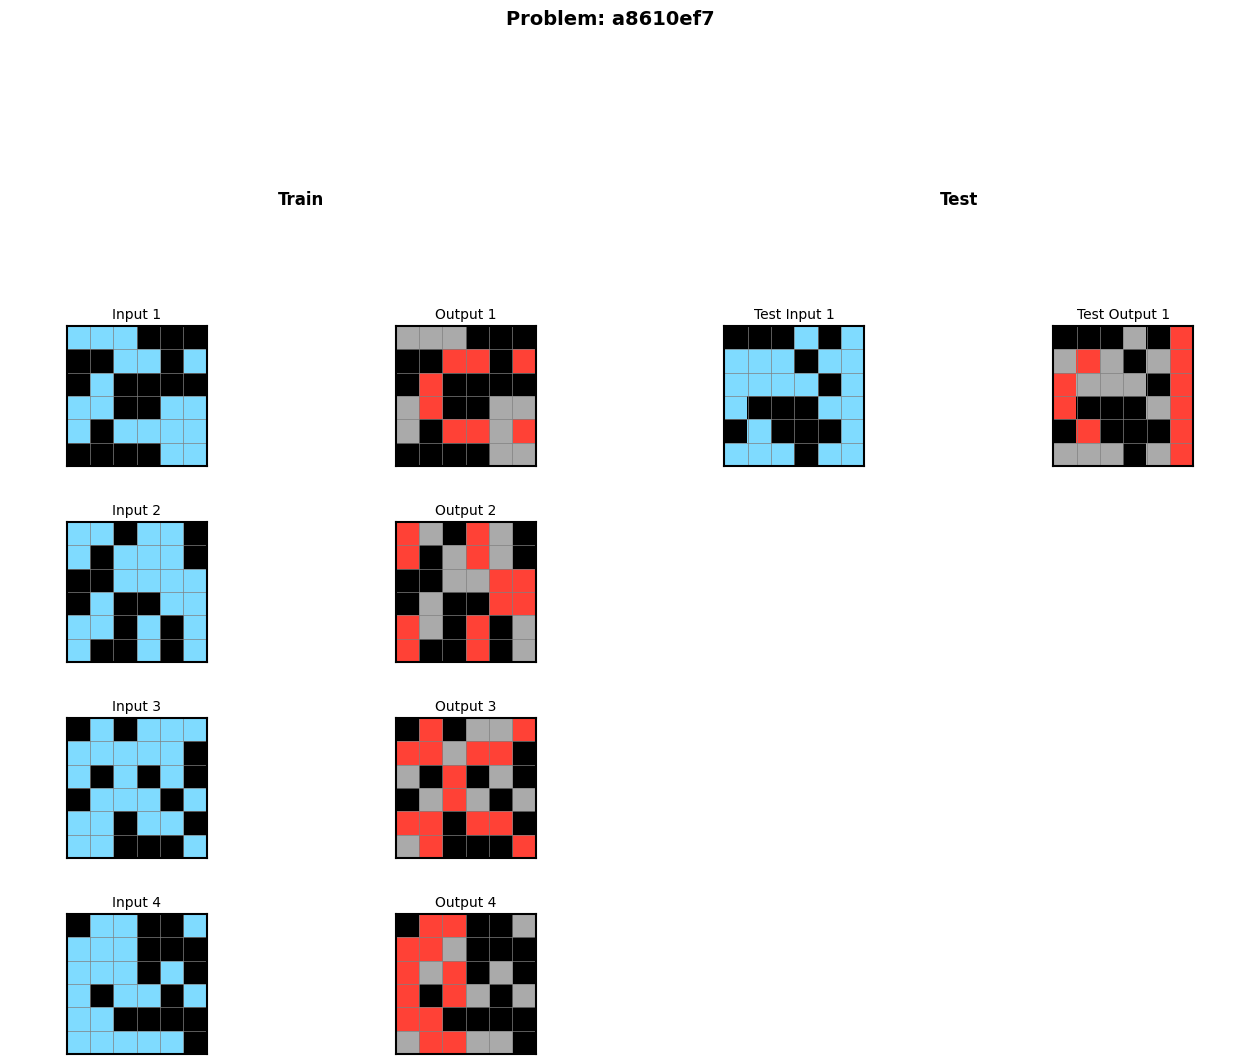



Problem: b4a43f3b


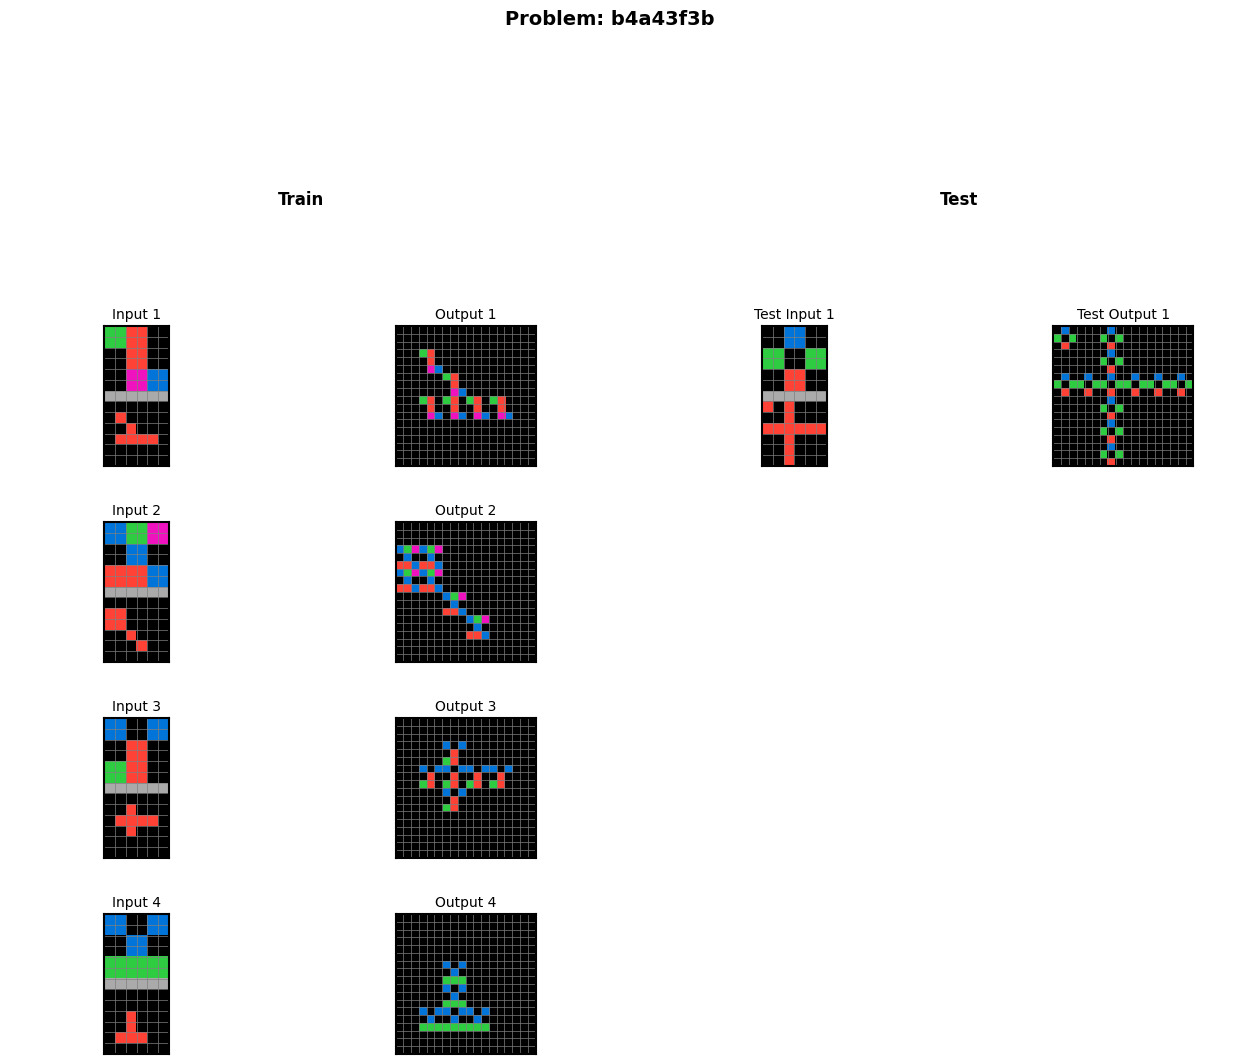



Problem: 79fb03f4


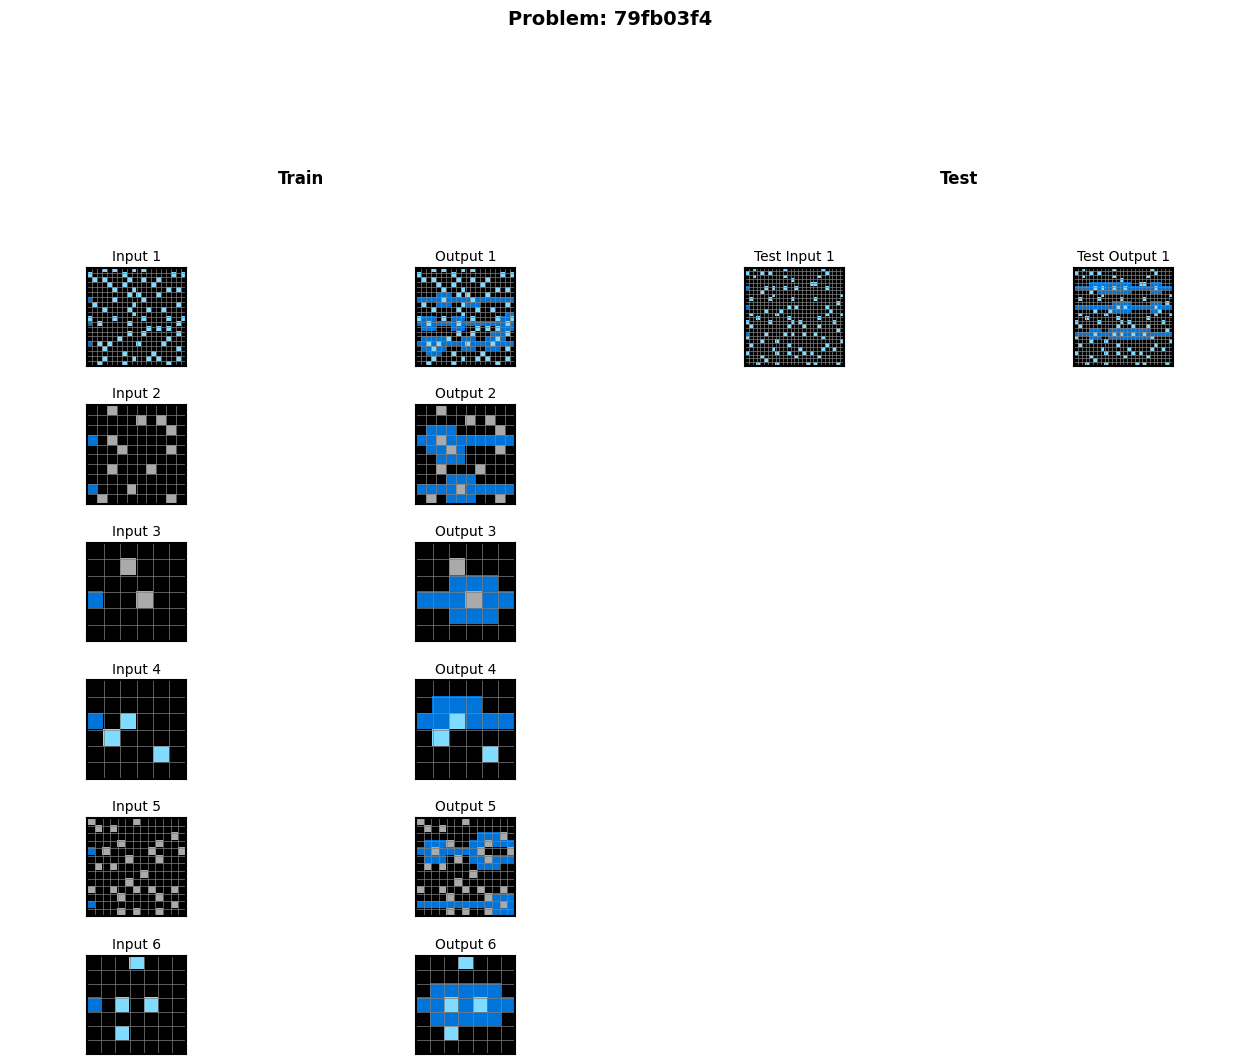



Problem: 52fd389e


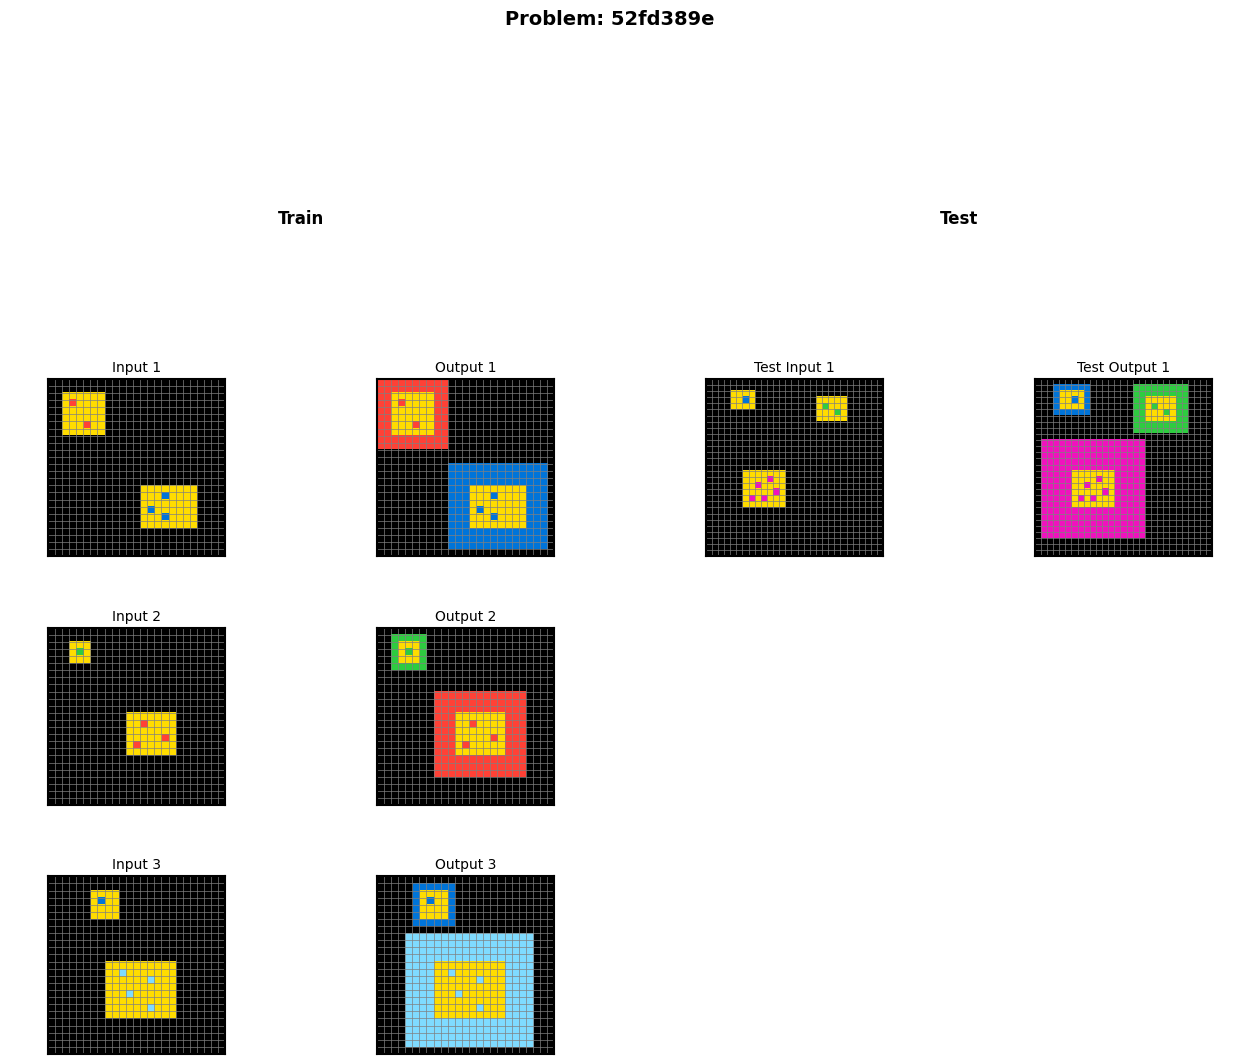



Problem: 891232d6


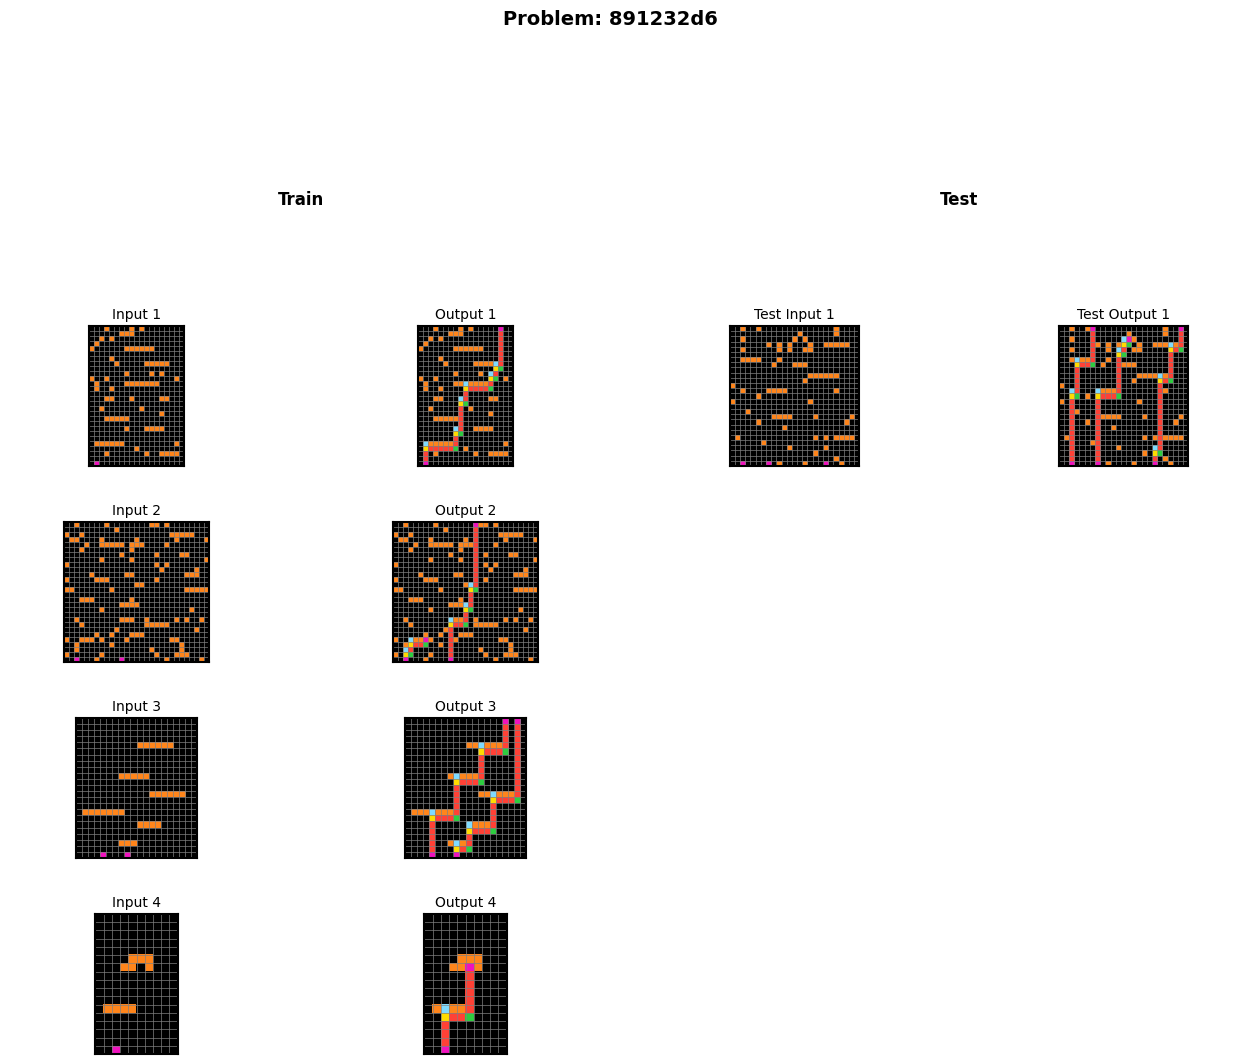



Problem: aa4ec2a5


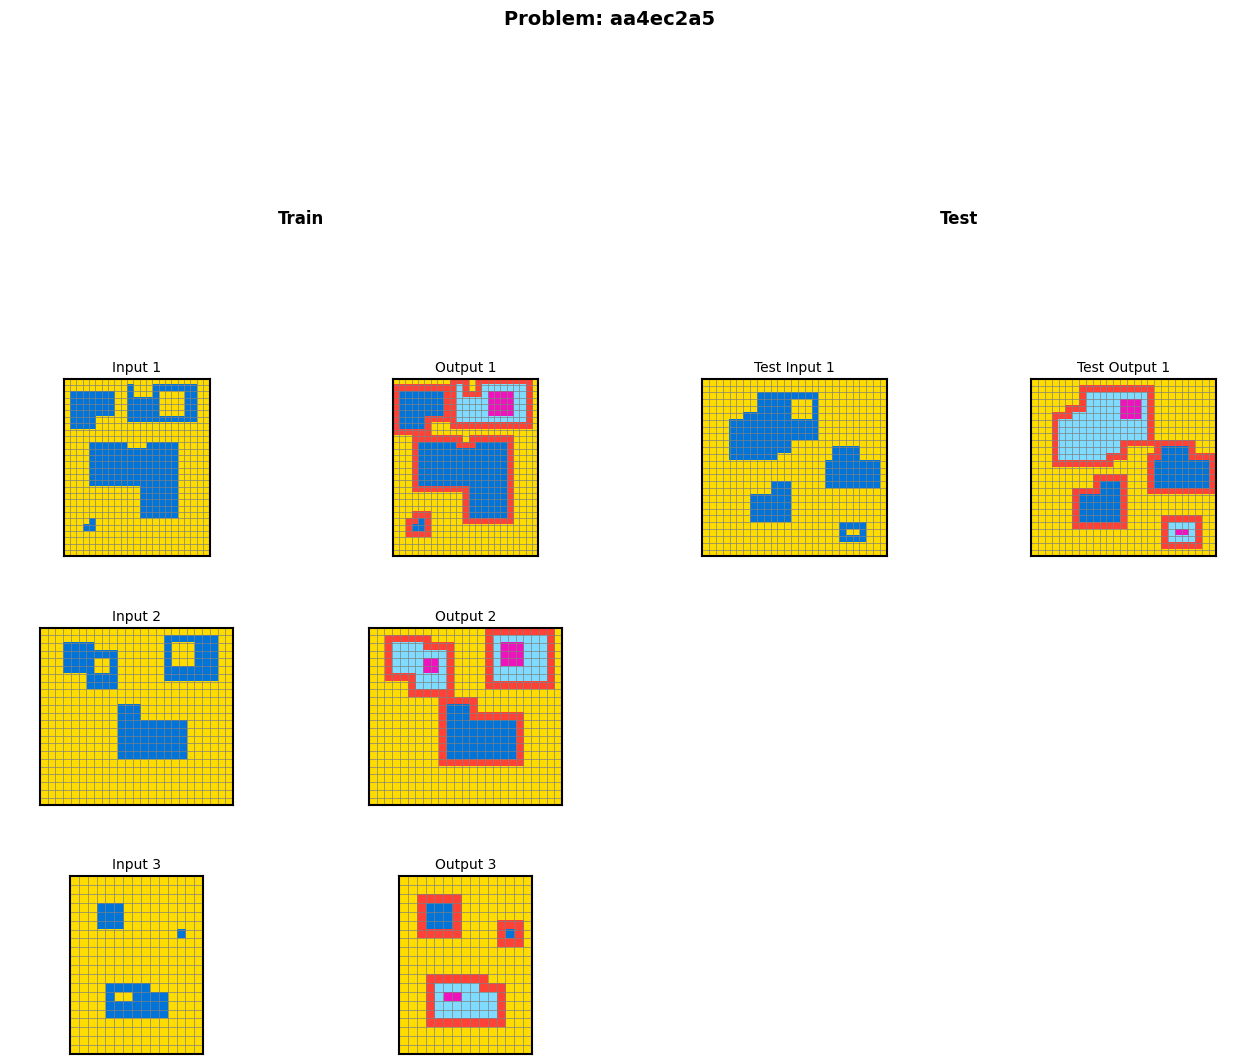



Problem: a3f84088


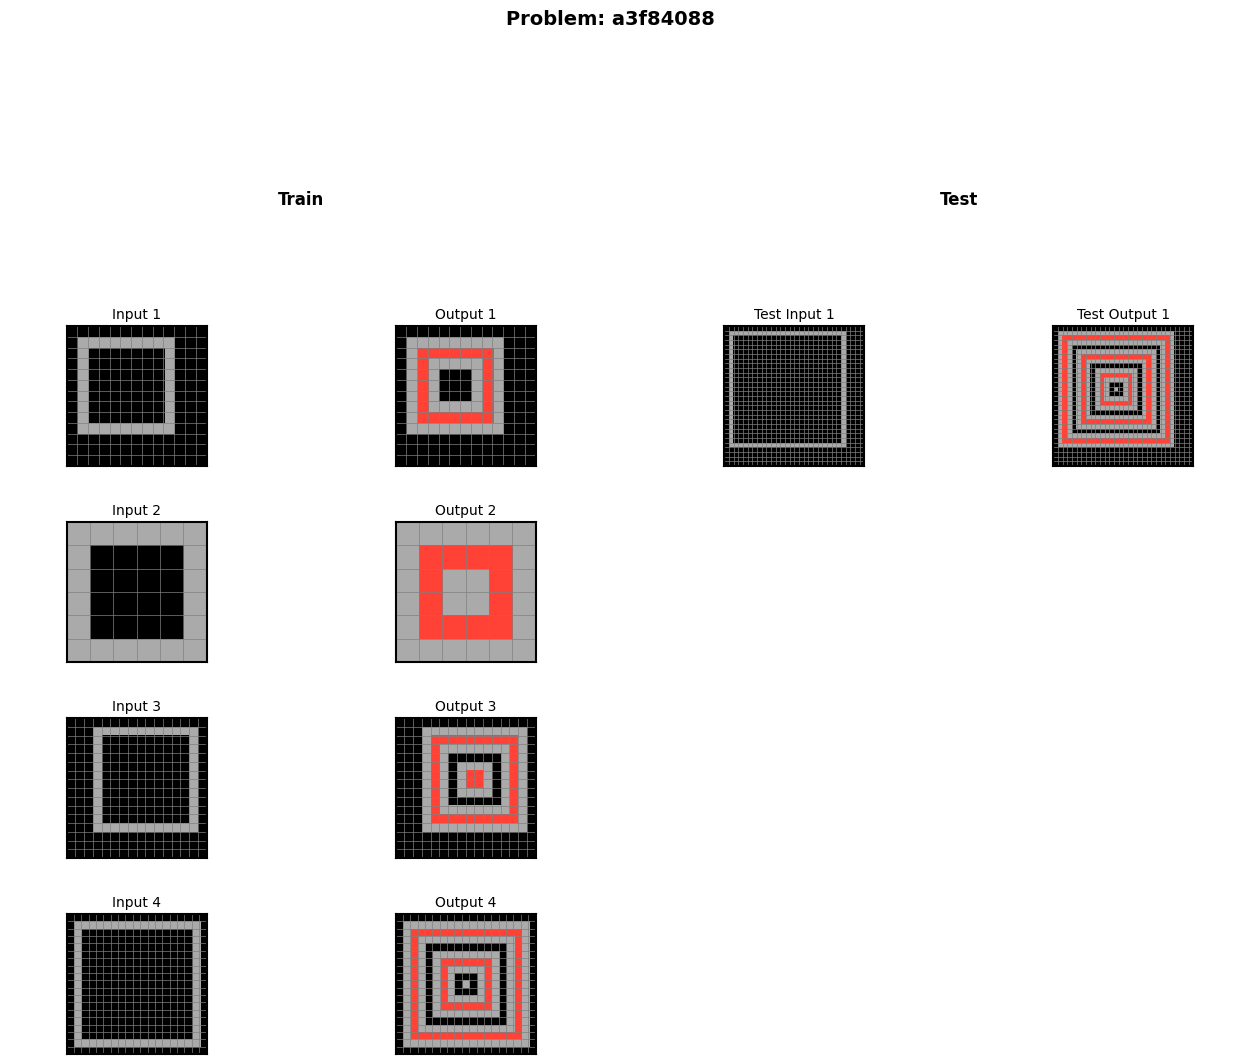



Problem: 8719f442


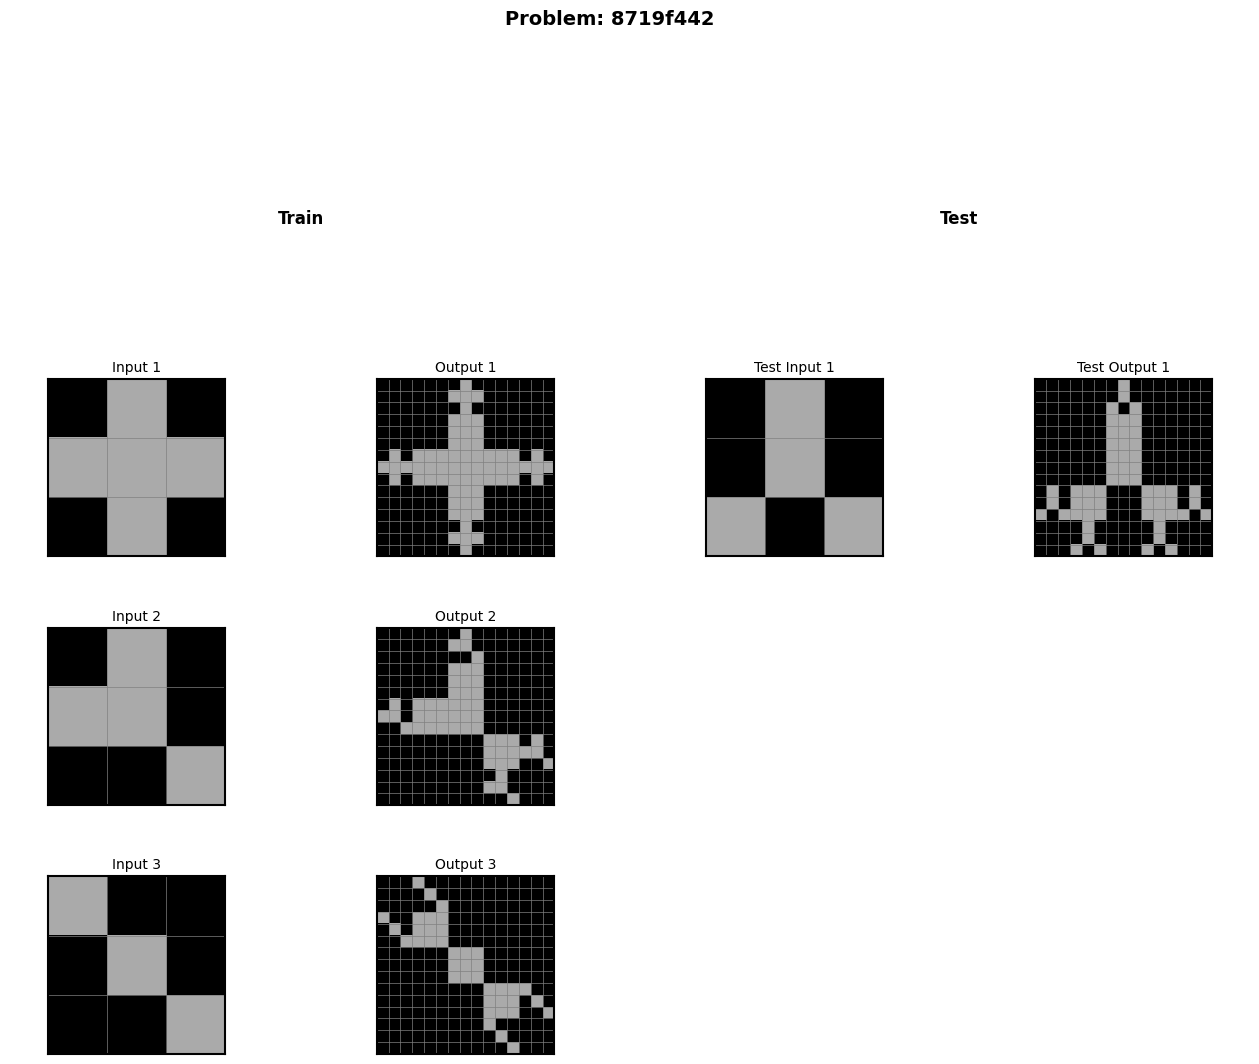

In [12]:
# Visualize each problem individually
for problem_id in problem_ids:
    print(f"\n{'='*50}")
    print(f"Problem: {problem_id}")
    print(f"{'='*50}")
    
    fig = visualize_problem(problem_id, challenges, solutions)
    plt.show()
    
    # Add some spacing between problems
    print()

In [13]:
# Save individual problem visualizations
import os

# Create output directory
output_dir = 'arc_visualizations'
os.makedirs(output_dir, exist_ok=True)

for problem_id in problem_ids:
    fig = visualize_problem(problem_id, challenges, solutions)
    filename = os.path.join(output_dir, f'{problem_id}.png')
    fig.savefig(filename, dpi=150, bbox_inches='tight')
    plt.close(fig)
    print(f"Saved visualization: {filename}")

print(f"\nAll visualizations saved to {output_dir}/")

/var/folders/nr/stbj19xd6kdbysxx0g064s180000gn/T/ipykernel_70771/764808414.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved visualization: arc_visualizations/a8610ef7.png
Saved visualization: arc_visualizations/b4a43f3b.png
Saved visualization: arc_visualizations/79fb03f4.png
Saved visualization: arc_visualizations/52fd389e.png
Saved visualization: arc_visualizations/891232d6.png
Saved visualization: arc_visualizations/aa4ec2a5.png
Saved visualization: arc_visualizations/a3f84088.png
Saved visualization: arc_visualizations/8719f442.png

All visualizations saved to arc_visualizations/
